<a href="https://colab.research.google.com/github/Rue-chelle/COVID-19-Global-Data-Tracker/blob/main/Covid_19_Data_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Global Data Tracker
This project analyses Covid-19 trends globally, including cases, deaths, and vaccinations over time using real-world data from Our World Data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url= "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df= pd.read_csv(url)
df.head()
#

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## Exploring the data
Checking column names, data types, and missing values.

In [17]:
#check dataset structure
df.info()

#Display column names
print(df.columns.tolist())
#check dataset structure
df.info()

#Display column names
print(df.columns.tolist())

#check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

## Cleaning the data
We focus on selecting countries (Kenya,Zimbabwe,South Africa,Nigeria), remove rows with missing critical data, and covert date columns.

In [18]:
#convert "date" to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter countries
countries= ['Kenya','Zimbabwe','South Africa','Nigeria']
df_filtered= df[df['location'].isin(countries)]

# Drop rows with missing critical values
df_clean= df_filtered.dropna(subset=['total_cases','total_deaths','total_vaccinations'])

#Preview cleaned data
df_clean.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
195746,KEN,Africa,Kenya,2021-03-04,105648.0,0.0,236.429,1854.0,0.0,5.286,...,20.4,24.651,1.4,66.7,0.601,54027484,NaN,NaN,NaN,NaN
195752,KEN,Africa,Kenya,2021-03-10,108362.0,0.0,387.714,1874.0,0.0,2.857,...,20.4,24.651,1.4,66.7,0.601,54027484,NaN,NaN,NaN,NaN
195756,KEN,Africa,Kenya,2021-03-14,112805.0,4443.0,634.714,1908.0,34.0,4.857,...,20.4,24.651,1.4,66.7,0.601,54027484,NaN,NaN,NaN,NaN
195759,KEN,Africa,Kenya,2021-03-17,112805.0,0.0,634.714,1908.0,0.0,4.857,...,20.4,24.651,1.4,66.7,0.601,54027484,NaN,NaN,NaN,NaN
195766,KEN,Africa,Kenya,2021-03-24,120163.0,0.0,1051.143,1994.0,0.0,12.286,...,20.4,24.651,1.4,66.7,0.601,54027484,NaN,NaN,NaN,NaN


## Data Visualisation.
 Using Kenya, Zimbabwe, South Africa, and Nigeria.

## Cases over time

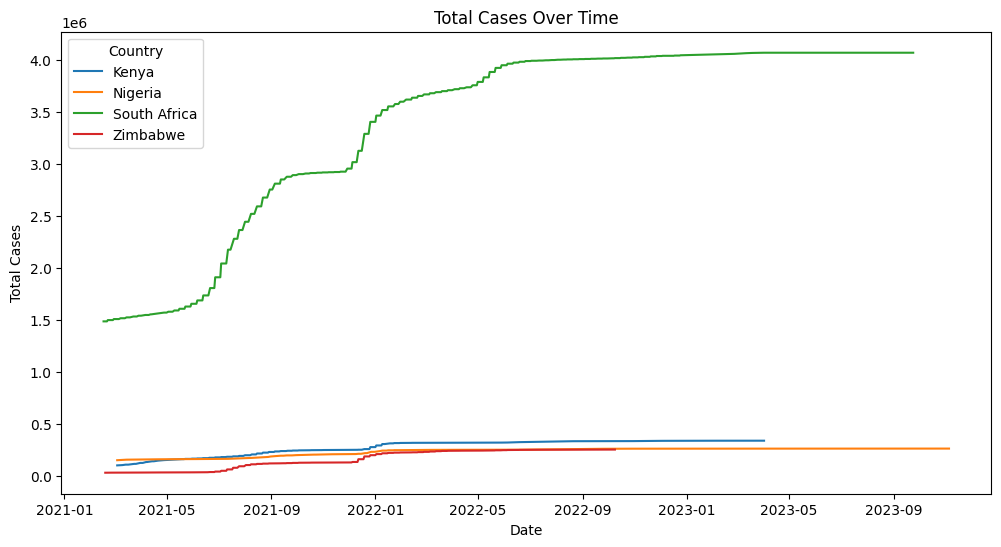

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x='date', y='total_cases', hue='location')
plt.title('Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.show()
#

- South Africa tops the chart with the highest cases over time while Zimbabwe is at the bottom of the chart.

# Death Rate Calculation

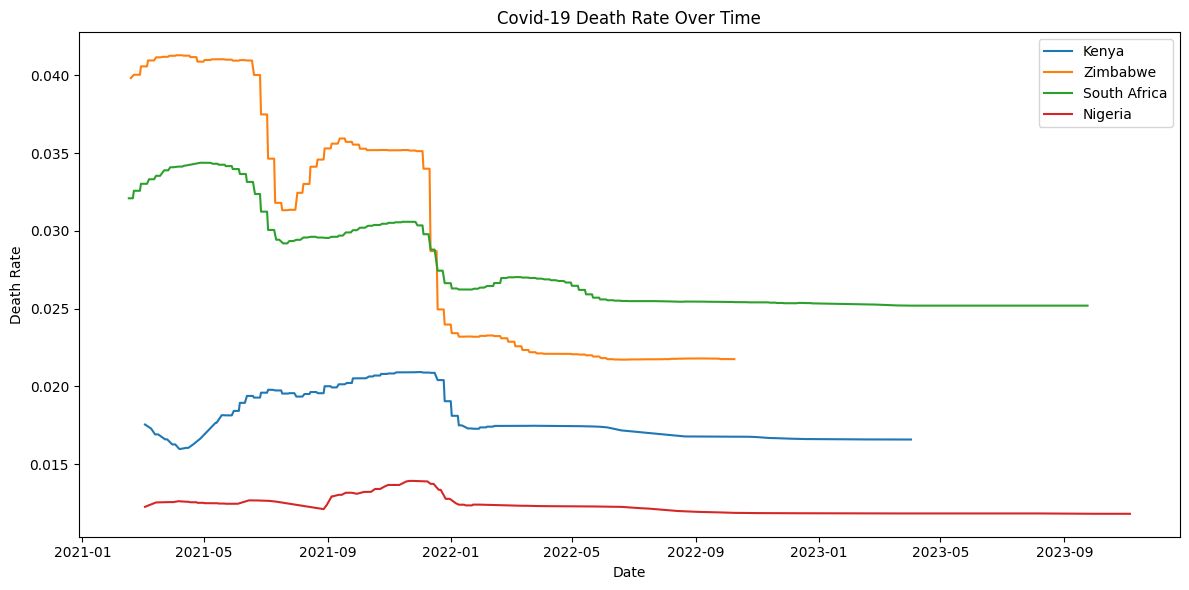

In [30]:
df_clean.loc [:,'death_rate'] = df_clean['total_deaths'] / df_clean['total_cases']

#plot death rate over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('Covid-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()
#



Zimbabwe had the highest death rate followed by south Africa and Kenya respectivelly

## Vaccination Progress

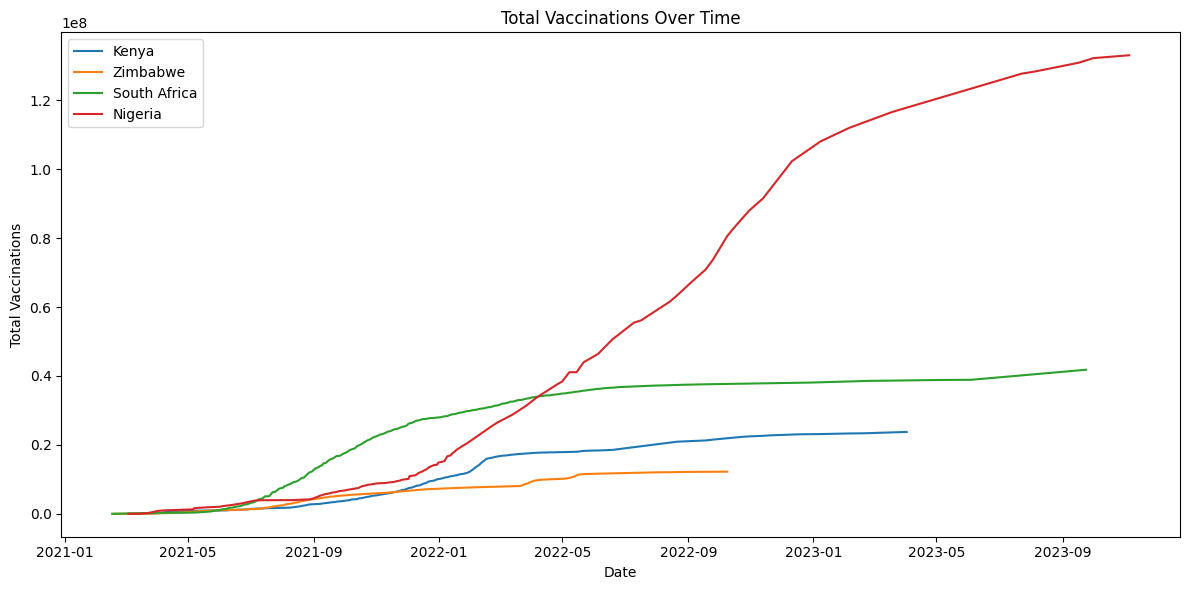

In [25]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()
#

Nigeria had the highest vaccination roll out output.

## Top 10 countries by Total Deaths

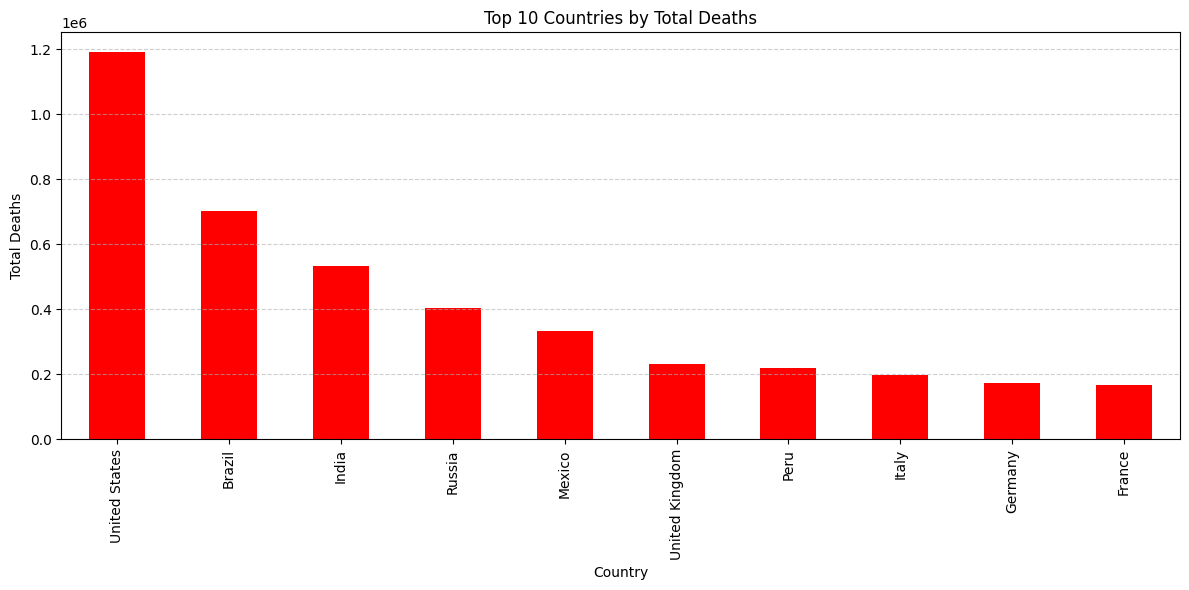

In [37]:
# Group by countries and get max total deaths for each
df.countries_only = df[~df['iso_code'].str.startswith('OWID')]

total_deaths_by_county = df.countries_only.groupby('location')['total_deaths'].max().sort_values(ascending=False).head(10)

#plot
plt.figure(figsize=(12, 6))
total_deaths_by_county.plot(kind='bar',color='red')
plt.title('Top 10 Countries by Total Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
#

## Insights and Reporting
- South Africa shows the highest cummulative case count.
- There was a rapid rise in all countries mid-2021 and early-2022
-Nigeria had a significant increase in vaccinations from early 2022 and has the highest number since then.
- Zimbabwe's case counts are the lowest among the selected countries but had a very high death rate.
- USA had the hightest number of deaths in the world, followed by Brazil and india respectively.